<a href="https://colab.research.google.com/github/lessons-data-ai-engineer/project_3-prepare_data_for_public_health_agency/blob/main/Fusilier_Antoine_1_notebook_112023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploration initiale des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 30.6 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

## 1.1. Importation des bibliothèques nécessaires

In [ ]:
import numpy as np
import pandas as pd # Pandas librairy to get data from any sources, csv or others file type
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import pycountry

## 1.2 Paramétrages des methodes de bibliothèques (si nécessaire)

- Aucun (pour l'instant)

## 1.3 Chargement des données
Ici nous avons récupérer les données via le site d'Open Food Facts (https://static.openfoodfacts.org/) au format csv, que nous avons stocker dans le dossier associé "Resources"
Instanciation dans la variable "df" pour dataframe
___Attention le chargement des données est couteuse en ressources, assurez-vous d'avoir les ressources matérielles nécessaire pour exécuter la lecture de 8go de données (3 à 10 millions de lignes)___

In [ ]:
df = pd.read_csv('./drive/MyDrive/test_notebook/resources/fr.openfoodfacts.org.products.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')

<ipython-input-8-59e3028427be>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./drive/MyDrive/test_notebook/resources/fr.openfoodfacts.org.products.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')
<ipython-input-8-59e3028427be>:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./drive/MyDrive/test_notebook/resources/fr.openfoodfacts.org.products.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')
Skipping line 35984: '	' expected after '"'
Skipping line 153938: '	' expected after '"'
Skipping line 153939: '	' expected after '"'
Skipping line 153940: '	' expected after '"'
Skipping line 169607: '	' expected after '"'


## 1.4 Aperçu des premières lignes, types de données, statistiques descriptives

### 1.4.1 Visualiser les premières et dernières lignes de donnnées

In [ ]:
print(f"Dataframe (Values.count(), Columns.count()) : ", df.shape)

Dataframe (Values.count(), Columns.count()) :  (144980, 162)


Les premières lignes :

In [ ]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Les dernières lignes :

In [ ]:
df.tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
6428,11150980982,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489071856,2017-03-09T15:04:16Z,1489071856,2017-03-09T15:04:16Z,Pita Chips With Cinnamon & Sugar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
6429,11150980999,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489074026,2017-03-09T15:40:26Z,1489074026,2017-03-09T15:40:26Z,"Pita Chips, Black Bean & Salsa",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN
6430,11150981002,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489074417,2017-03-09T15:46:57Z,1489074417,2017-03-09T15:46:57Z,Kale Crunch,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
6431,11150981040,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489075840,2017-03-09T16:10:40Z,1489075840,2017-03-09T16:10:40Z,Jumbo Toasted Corn,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN
6432,11150981064,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489074028,2017-03-09T15:40:28Z,1489074028,2017-03-09T15:40:28Z,"Jumbo Toasted Corn, Barbeque",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.4.2. Analyse des types de données

Liste des type de données pour chaque colonnes

In [ ]:
df.dtypes

code                         int64
url                         object
creator                     object
created_t                    int64
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

### 1.4.3. Statistiques descriptives

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(108), int64(3), object(51)
memory usage: 8.0+ MB


#### 1.4.3.1. Résumé statistique

In [ ]:
df.describe()

,code,created_t,last_modified_t,cities,allergens_fr,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,6.433000e+03,6.433000e+03,6.433000e+03,0.0,0.0,0.0,6224.000000,6224.000000,0.0,6224.000000,...,0.0,3.000000,0.0,0.0,0.0,0.0,4862.000000,4862.000000,0.0,0.0
mean,1.007034e+10,1.487057e+09,1.487899e+09,NaN,NaN,NaN,2.491485,0.000321,NaN,0.067963,...,NaN,25.133333,NaN,NaN,NaN,NaN,9.758124,9.754216,NaN,NaN
std,5.454510e+09,1.111509e+07,7.408367e+06,NaN,NaN,NaN,2.896843,0.017924,NaN,0.258007,...,NaN,21.768172,NaN,NaN,NaN,NaN,9.286006,9.289790,NaN,NaN
min,3.000000e+00,1.345024e+09,1.389217e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,-9.000000,-9.000000,NaN,NaN
25%,1.090903e+10,1.489061e+09,1.489061e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,18.700000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
50%,1.111081e+10,1.489068e+09,1.489068e+09,NaN,NaN,NaN,2.000000,0.000000,NaN,0.000000,...,NaN,37.400000,NaN,NaN,NaN,NaN,10.000000,10.000000,NaN,NaN
75%,1.111097e+10,1.489078e+09,1.489080e+09,NaN,NaN,NaN,4.000000,0.000000,NaN,0.000000,...,NaN,37.700000,NaN,NaN,NaN,NaN,18.000000,18.000000,NaN,NaN
max,8.259273e+10,1.492609e+09,1.492710e+09,NaN,NaN,NaN,25.000000,1.000000,NaN,3.000000,...,NaN,38.000000,NaN,NaN,NaN,NaN,35.000000,35.000000,NaN,NaN


In [ ]:
df.describe(include=[np.object_, pd.Categorical])

,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,...,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
count,6433,6433,6433,6433,6344,65,173,109,109,6217,...,4863,175,176,6433,6433,6433,138,138,187,187
unique,6433,39,2959,2923,5168,64,134,78,72,569,...,5,11,24,90,90,90,61,61,187,187
top,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09T09:59:38Z,2017-03-09T09:59:38Z,Ice Cream,Sliced Bread,1,bucket,bucket,Kroger,...,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:dietary-supplements,Compléments alimentaires,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...
freq,1,6095,12,12,19,2,5,6,6,1593,...,1289,84,84,6013,6013,6013,9,9,1,1


In [ ]:
df.info(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        int64  
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   int64  
 4    created_datetime                            object 
 5    last_modified_t                             int64  
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags     

#### 1.4.3.2. Fréquence et modes

In [ ]:
df.mode()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,1.611700e+04,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1.489054e+09,2017-03-09T09:59:38Z,1.489054e+09,2017-03-09T09:59:38Z,Ice Cream,Sliced Bread,1,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,2.460000e+04,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100 g,...,NaN,37.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.123300e+04,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.800100e+04,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.800800e+09,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,NaN,http://world-fr.openfoodfacts.org/produit/0011...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6429,NaN,http://world-fr.openfoodfacts.org/produit/0011...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6430,NaN,http://world-fr.openfoodfacts.org/produit/0011...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6431,NaN,http://world-fr.openfoodfacts.org/produit/0011...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4.3.3. Mesure de tendance centrale

In [ ]:
df.mean()

<ipython-input-16-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


code                       1.007034e+10
created_t                  1.487057e+09
last_modified_t            1.487899e+09
cities                              NaN
allergens_fr                        NaN
                               ...     
carbon-footprint_100g               NaN
nutrition-score-fr_100g    9.758124e+00
nutrition-score-uk_100g    9.754216e+00
glycemic-index_100g                 NaN
water-hardness_100g                 NaN
Length: 111, dtype: float64

In [ ]:
df.median()

<ipython-input-17-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


code                       1.111081e+10
created_t                  1.489068e+09
last_modified_t            1.489068e+09
cities                              NaN
allergens_fr                        NaN
                               ...     
carbon-footprint_100g               NaN
nutrition-score-fr_100g    1.000000e+01
nutrition-score-uk_100g    1.000000e+01
glycemic-index_100g                 NaN
water-hardness_100g                 NaN
Length: 111, dtype: float64

#### 1.4.3.4. Mesure de dispersion

In [ ]:
df.var()

<ipython-input-18-28ded241fd7c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


code                       2.975168e+19
created_t                  1.235453e+14
last_modified_t            5.488390e+13
cities                              NaN
allergens_fr                        NaN
                               ...     
carbon-footprint_100g               NaN
nutrition-score-fr_100g    8.622990e+01
nutrition-score-uk_100g    8.630020e+01
glycemic-index_100g                 NaN
water-hardness_100g                 NaN
Length: 111, dtype: float64

In [ ]:
df.std()

<ipython-input-19-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


code                       5.454510e+09
created_t                  1.111509e+07
last_modified_t            7.408367e+06
cities                              NaN
allergens_fr                        NaN
                               ...     
carbon-footprint_100g               NaN
nutrition-score-fr_100g    9.286006e+00
nutrition-score-uk_100g    9.289790e+00
glycemic-index_100g                 NaN
water-hardness_100g                 NaN
Length: 111, dtype: float64

#### 1.4.3.5. Mesure de forme de distribution

In [ ]:
df.skew()

<ipython-input-24-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


code                       6.558954
created_t                 -6.505858
last_modified_t           -7.025676
cities                          NaN
allergens_fr                    NaN
                             ...   
carbon-footprint_100g           NaN
nutrition-score-fr_100g    0.059902
nutrition-score-uk_100g    0.061117
glycemic-index_100g             NaN
water-hardness_100g             NaN
Length: 111, dtype: float64

In [ ]:
df.kurt()

<ipython-input-25-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


code                       81.940964
created_t                  47.576898
last_modified_t            53.059462
cities                           NaN
allergens_fr                     NaN
                             ...    
carbon-footprint_100g            NaN
nutrition-score-fr_100g    -1.124060
nutrition-score-uk_100g    -1.126163
glycemic-index_100g              NaN
water-hardness_100g              NaN
Length: 111, dtype: float64

#### 1.4.3.6. Corrélations et tableaux croisés

In [ ]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,code,created_t,last_modified_t,cities,allergens_fr,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
code,1.000000,0.230503,0.222166,NaN,NaN,NaN,0.067935,-0.035129,NaN,-0.004129,...,NaN,-0.237649,NaN,NaN,NaN,NaN,-0.052341,-0.051498,NaN,NaN
created_t,0.230503,1.000000,0.791115,NaN,NaN,NaN,0.014863,-0.012761,NaN,-0.008431,...,NaN,-0.661339,NaN,NaN,NaN,NaN,0.002030,0.006197,NaN,NaN
last_modified_t,0.222166,0.791115,1.000000,NaN,NaN,NaN,-0.000917,0.012210,NaN,-0.016273,...,NaN,-0.857393,NaN,NaN,NaN,NaN,0.042401,0.046119,NaN,NaN
cities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
allergens_fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
carbon-footprint_100g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition-score-fr_100g,-0.052341,0.002030,0.042401,NaN,NaN,NaN,0.129714,-0.004961,NaN,0.047298,...,NaN,-0.794165,NaN,NaN,NaN,NaN,1.000000,0.999441,NaN,NaN
nutrition-score-uk_100g,-0.051498,0.006197,0.046119,NaN,NaN,NaN,0.129409,-0.004956,NaN,0.047324,...,NaN,-0.794165,NaN,NaN,NaN,NaN,0.999441,1.000000,NaN,NaN
glycemic-index_100g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4.3.7. Graphiques et visualisations

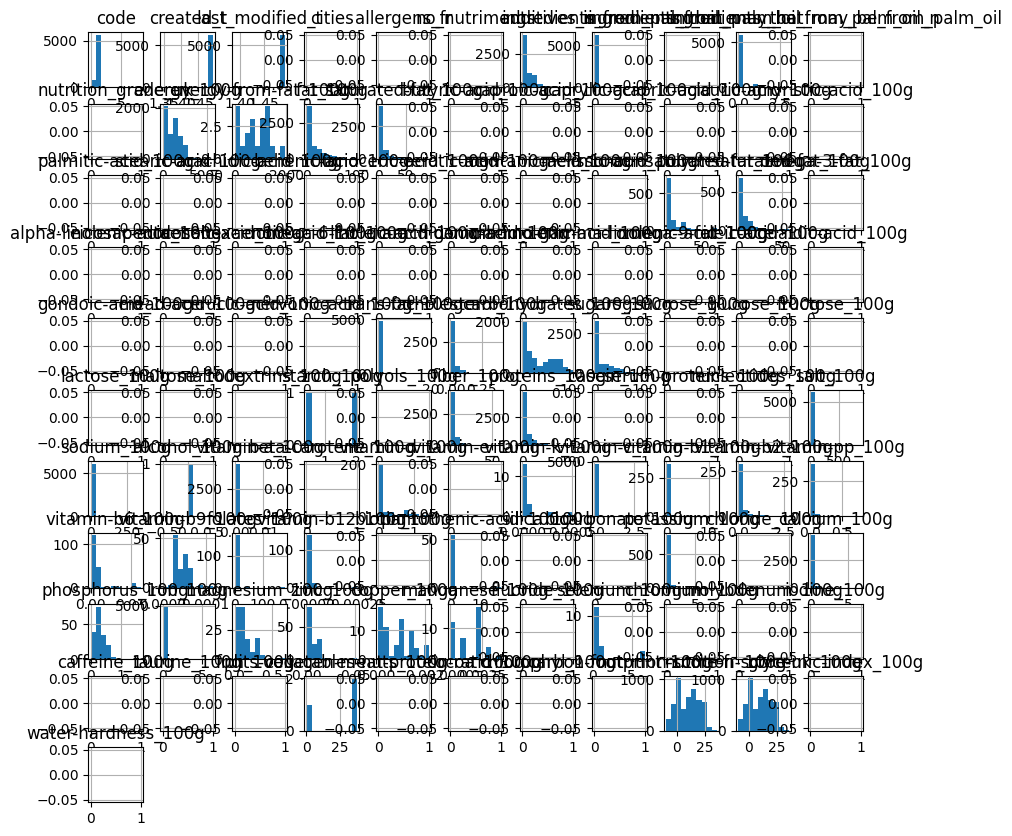

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

## 1.5 Autre affichage , section de colonnes et découpage

Dans la fonction ci-après nous division notre dataset en par les sections définis dans la documentation

In [ ]:
def extract_sections_from_description(file_path):
    sections = {}
    current_section = None

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith("#"):
            current_section = line.replace("#", "").strip().replace(" ", "_").replace(":", "").replace(".", "").lower()
            sections[current_section] = []
        elif current_section and ":" in line:
            field_name = line.strip().split(" : ")[0].lower()
            sections[current_section].append(field_name)

    return sections

    print(sections)

# Extraire les sections et descriptions
desc_file_path = "./resources/data-fields.txt"
sections = extract_sections_from_description(desc_file_path)

# Associer les données aux descriptions et diviser par section
section_data = {}
for section, columns in sections.items():
    # Condition pour éviter les champs manquants de la section Misc. data
    # if section != "misc. data":
    # Utiliser une approche basée sur les sous-chaînes pour correspondre aux colonnes
    # valid_columns = [col for col in df.columns if any(field.lower() in col.lower() for field in columns)]
    # print(f"valid_columns :: {df.columns}")
    valid_columns = [col for col in df.columns if any(str(field) == str(col) for field in columns)]
    print(f"valid_columns :: {valid_columns}")
    # if valid_columns:
        # section_data[section] = df[valid_columns]

        # Création d'une variable pour chaque section
    section_var_name = section.strip().replace(" ", "_").replace(":", "").replace(".", "").lower()
    globals()[section_var_name] = df[valid_columns]
    print(f"Section en cours : {section_var_name}")
    # print(globals()[section_var_name].head())

# Affichage des sections et de leurs données
for section, df_section in section_data.items():
    print(f"\nSection: {section}")
    # print(df_section.head())

valid_columns :: ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'product_name', 'generic_name', 'quantity']
Section en cours : general_information
valid_columns :: ['packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr']
Section en cours : tags
valid_columns :: ['ingredients_text', 'traces', 'traces_tags']
Section en cours : ingredients
valid_columns :: ['serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_f

Nous pouvons appeler chaque section dans la variable global en donnant en clef le nom de la section désirée

In [ ]:
globals()["general_information"].head()

,code,url,creator,created_t,created_datetime,last_modified_t,product_name,generic_name,quantity
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,Farine de blé noir,NaN,1kg
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,Banana Chips Sweetened (Whole),NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,Peanuts,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,Organic Salted Nut Mix,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,Organic Polenta,NaN,NaN


In [ ]:
globals()["tags"].head()

,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,...,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr
0,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
2,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
3,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis
4,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis


In [ ]:
globals()["ingredients"].head()

,ingredients_text,traces,traces_tags
0,NaN,NaN,NaN
1,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN
2,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN
3,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN
4,Organic polenta,NaN,NaN


In [ ]:
globals()["misc_data"].head()

,serving_size,no_nutriments,additives_n,additives,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,main_category,main_category_fr,image_url,image_small_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d,NaN,NaN,NaN,NaN
2,28 g (0.25 cup),NaN,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,b,NaN,NaN,NaN,NaN
3,28 g (0.25 cup),NaN,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d,NaN,NaN,NaN,NaN
4,35 g (0.25 cup),NaN,0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
globals()["nutrition_facts"].head()

,energy_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,...,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,1941.0,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2540.0,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,1552.0,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Préparation et Nettoyage des Données

## 2.1. Identification des colonnes avec données manquantes

Identification des colonnes avec plus de 50% de données manquantes

In [ ]:
missing_values = df.isnull().sum() / len(df) * 100

Affichage des colonnes avec plus de 50% de valeurs null

In [ ]:
high_missing_values = missing_values[missing_values > 50]
print(f"Columns with more than 50% missing data :\n {high_missing_values}")

Columns with more than 50% missing data :
 generic_name              83.541013
quantity                  67.322387
packaging                 75.384001
packaging_tags            75.383690
categories                73.684949
                            ...    
cocoa_100g                99.704458
chlorophyl_100g          100.000000
carbon-footprint_100g     99.916450
glycemic-index_100g      100.000000
water-hardness_100g      100.000000
Length: 128, dtype: float64


## 2.2 Suppression des colonnes avec plus de 50% de valeurs null

In [ ]:
columns_droped = high_missing_values.index;
df = df.loc[:, df.isnull().mean() < .5]

print(f"Columns deleted : \n{columns_droped}")
print(f"Df length after deletion : {df.shape}")

Columns deleted : 
Index(['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories',
       'categories_tags', 'categories_fr', 'origins', 'origins_tags',
       'manufacturing_places',
       ...
       'caffeine_100g', 'taurine_100g', 'ph_100g',
       'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g',
       'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g',
       'glycemic-index_100g', 'water-hardness_100g'],
      dtype='object', length=128)
Df length after deletion : (320767, 34)


In [ ]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


## 2.3 Évaluation de la pertinence des colonnes restantes

Dans cette partie nous allons décider quelles colonnes il est pertinent de garder pour notre analyse. Nous le faisons manuellement nous pourrions utiliser un modèle comme ChatGPT qui nous renverrais un taux de pertinence en fonction du sujet abordé.

In [ ]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

'code', --TI -- Code produit : peut être important pour d'éventuelle relations
 'product_name', -IMPORTANT
 'brands',--TI
 'countries_fr', - pi
 'additives_n',
 'nutriscore_grade', --TI
 'main_category_fr', -- DELETE --TI
 'energy-kcal_100g', -IMPORTANT
 'energy_100g', -IMPORTANT
 'fat_100g', -IMPORTANT
 'saturated-fat_100g', -IMPORTANT
 'carbohydrates_100g', -IMPORTANT
 'sugars_100g', -IMPORTANT
 'fiber_100g', -IMPORTANT
 'proteins_100g', -IMPORTANT
 'salt_100g', -IMPORTANT
 'sodium_100g', -IMPORTANT
 'fruits-vegetables-nuts-estimate-from-ingredients_100g'

In [ ]:
columns_to_keep = ["code","product_name","brands","countries_fr","additives_n","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g"]

## 2.4. Sélection et découpage des colonnes pertinentes

## 2.5 Nettoyage et filtrage des colonnes

## 2.6. Suppression des colonnes non nécessaires pour l'analyse

Dans cette partie nous allons supprimer de notre data frame les colonnes défini juste précédement comme "non pertinantes" pour notre analyse

In [ ]:
df = df[columns_to_keep];

print(f"Final columns : \n{df.columns}")

Final columns : 
Index(['code', 'product_name', 'brands', 'countries_fr', 'additives_n',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g'],
      dtype='object')


# 3. Nettoyage Approfondi des Données

## 3.1. Gestion des valeurs manquantes et doublons

### 3.1.1. Suppression des lignes nulles pour des colonnes clés

Car sans valeurs aucune valeurs ne peut y etre associé

In [ ]:
print(f"Data frame infos before deleting null values: {df.shape}")

df = df.dropna(subset=['product_name', 'code'])

print(f"Data frame infos after delete null values: {df.shape}")

Data frame infos before deleting null values: (320767, 14)
Data frame infos after delete null values: (302982, 14)


### 3.1.2. Suppression des doublons basés sur des identifiants uniques

Le code est l'identifiant unique d'un produit, un doublon de cette valeur indiquerais une erreur, une fausse observation (ici record)

In [ ]:
print(f"Data frame infos before deleting duplicates of `code` : {df.shape}")

df = df.drop_duplicates(subset='code')

print(f"Data frame infos after delete duplicates of `code`: {df.shape}")

Data frame infos before deleting duplicates of `code` : (302982, 14)
Data frame infos after delete duplicates of `code`: (302982, 14)


## 3.2 Traitement des valeurs aberrantes

### 3.2.1. Gestion des NAN et valeurs aberrantes pour certaines mesures

In [ ]:
# Getting finished by _100g columns....
numeric_cols = df.columns[df.columns.str.contains('_100g')]
for col in numeric_cols:
    ## Numeric conversion...
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Replacement of extreme value by NaN value
    df[col] = df[col].apply(lambda x: np.nan if x <= 0 or x > 100 else x)

In [ ]:
df.head()

,code,product_name,brands,countries_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000003087,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),NaN,États-Unis,0.0,NaN,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN
2,0000000004559,Peanuts,Torn & Glasser,États-Unis,0.0,NaN,17.86,NaN,60.71,17.86,7.1,17.86,0.63500,0.250
3,0000000016087,Organic Salted Nut Mix,Grizzlies,États-Unis,0.0,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482
4,0000000016094,Organic Polenta,Bob's Red Mill,États-Unis,0.0,NaN,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN


### 3.2.2. Détection et traitement des outliers

In [ ]:
composants = df.columns[df.columns.str.endswith('salt_100g')]  # Colonnes de composants
for col in composants:
    if col != '_100g':  # Remplacer 'sel_100g' par la colonne réelle du sel
        df[col] = np.where(df[col] >= 100, np.nan, df[col])

## 3.3 Normalisation et transformation des données

### 3.3.1 Normalisation des données numériques

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

### 3.3.2 Normalisation des données textuelles

In [ ]:
normalize_text = lambda value: value if pd.isna(value) else value.strip().lower()

In [ ]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.lower().str.strip())

## 3.4. Validation de la cohérence des données

### 3.4.1. Vérification des valeurs numériques

In [ ]:
energy_min, energy_max = 0, 900  # Basic range for 100g
assert df['energy_100g'].dropna().between(energy_min, energy_max).all(), "Out of order"

In [ ]:
nutrient_cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
for col in nutrient_cols:
    assert df[col].dropna().ge(0).all(), f"Valeurs négatives détectées dans {col}"

### 3.4.2. Cohérence des données additives

Verification si la valeur de 'additives_n' est réelle et logique

In [ ]:
assert df['additives_n'].dropna().ge(0).all(), "Valeurs négatives trouvées dans additives_n"

### 3.4.3. Vérification de la cohérence des grades de nutriscore

### 3.4.4. Contrôle des estimations


### 3.4.5. Vérification de la cohérence des noms de produits et marques

### 3.4.6. Vérification des noms de pays

In [ ]:
list_countries = [country.name.lower() for country in pycountry.countries]

def is_valid_country(country):
    if isinstance(country, str):
        return country.lower() in list_countries
    else:
        return False

df['countries_fr'] = df['countries_fr'].dropna()
df['countries_fr'] = df['countries_fr'].apply(is_valid_country)
df['countries_fr'] = df['countries_fr'] != False

# invalids = df['countries_fr'].apply(is_valid_country)

# assert invalids.all(), "Des pays non valides ont été détectés !"

In [ ]:
df.head()

,code,product_name,brands,countries_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000003087,farine de blé noir,ferme t'y r'nao,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,banana chips sweetened (whole),NaN,False,0.0,NaN,0.285699,0.285699,0.642896,0.142899,0.035999,0.035699,NaN,NaN
2,0000000004559,peanuts,torn & glasser,False,0.0,NaN,0.178599,NaN,0.607096,0.178599,0.070999,0.178599,0.006354,0.00250
3,0000000016087,organic salted nut mix,grizzlies,False,0.0,NaN,0.571400,0.053599,0.178592,0.035699,0.070999,0.178599,0.012251,0.00482
4,0000000016094,organic polenta,bob's red mill,False,0.0,NaN,0.014299,NaN,0.771398,NaN,0.056999,0.085699,NaN,NaN


### 3.4.7. Validation des codes produits

In [ ]:
code_length_check = df['code'].astype(str).str.len().eq(13)
print(f"Code checking ... ${code_length_check}")

print(f"Deleting invalides codes...")
df = df[code_length_check]

Code checking ... $0          True
1          True
2          True
3          True
4          True
          ...  
320762     True
320763    False
320764     True
320765     True
320766    False
Name: code, Length: 302982, dtype: bool
Deleting invalides codes...


In [ ]:
assert df['code'].astype(str).str.len().eq(13).all(), "Codes produits de longueur incohérente"

# 4. Imputation des Valeurs Manquantes

## 4.1. Imputation par la médiane

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

## 4.2. Imputation par la moyenne

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

## 4.3. Imputation par KNN

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))

In [ ]:
df.head()

,code,product_name,brands,countries_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000003087,farine de blé noir,ferme t'y r'nao,True,0.032258,0.709942,0.119999,0.045499,0.266693,0.091999,0.029999,0.066699,0.007805,0.00308
1,0000000004530,banana chips sweetened (whole),NaN,False,0.000000,0.709942,0.285699,0.285699,0.642896,0.142899,0.035999,0.035699,0.007805,0.00308
2,0000000004559,peanuts,torn & glasser,False,0.000000,0.709942,0.178599,0.045499,0.607096,0.178599,0.070999,0.178599,0.006354,0.00250
3,0000000016087,organic salted nut mix,grizzlies,False,0.000000,0.709942,0.571400,0.053599,0.178592,0.035699,0.070999,0.178599,0.012251,0.00482
4,0000000016094,organic polenta,bob's red mill,False,0.000000,0.709942,0.014299,0.045499,0.771398,0.091999,0.056999,0.085699,0.007805,0.00308


In [ ]:
from sklearn.impute import KNNImputer

def impute_numeric_columns(df, suffix="_100g"):
    # Sélectionner les colonnes numériques qui se terminent par le suffixe donné
    num_cols = df.select_dtypes(include=['number'])
    cols_to_impute = [col for col in num_cols.columns if col.endswith(suffix)]

    # Vérifier si la sélection de colonnes n'est pas vide
    if not cols_to_impute:
        print("Aucune colonne numérique avec le suffixe spécifié trouvée.")
        return df

    # Appliquer KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

    return df

# Appliquer la fonction à votre DataFrame
df = impute_numeric_columns(df)

ValueError: ignored

In [ ]:
df.shape

(287133, 14)

# 5. Vérification Post-Imputation

## 5.1. Ré-évaluation des statistiques descriptives

In [ ]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,287133.000000,287133.000000,287133.000000,287133.000000,287133.000000,287133.000000,287133.000000,287133.000000,287133.000000,287133.000000
mean,0.057421,0.707217,0.151612,0.060175,0.330400,0.158437,0.035867,0.082189,0.015456,0.006284
std,0.074405,0.053218,0.143448,0.063621,0.248382,0.185923,0.034297,0.068458,0.056515,0.024234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.709942,0.089999,0.039999,0.132491,0.046699,0.029999,0.047599,0.003508,0.001380
50%,0.032258,0.709942,0.119999,0.045499,0.266693,0.091999,0.029999,0.066699,0.007805,0.003080
75%,0.064516,0.709942,0.157899,0.049999,0.513195,0.168099,0.029999,0.087999,0.011896,0.004690
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999758,1.000000


## 5.2. Vérification de la distribution des données imputées

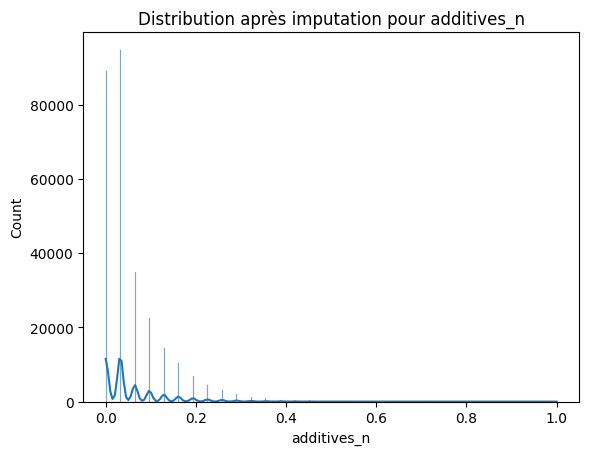

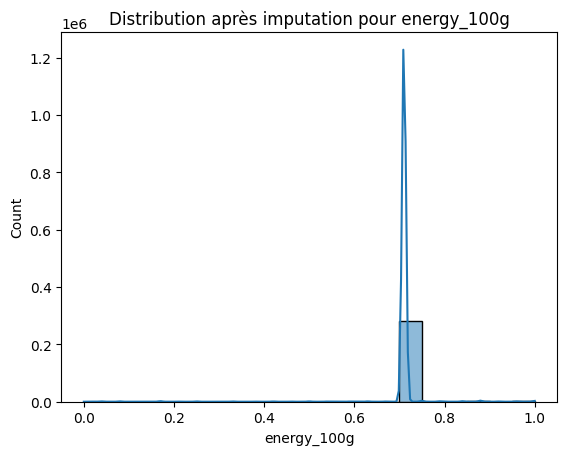

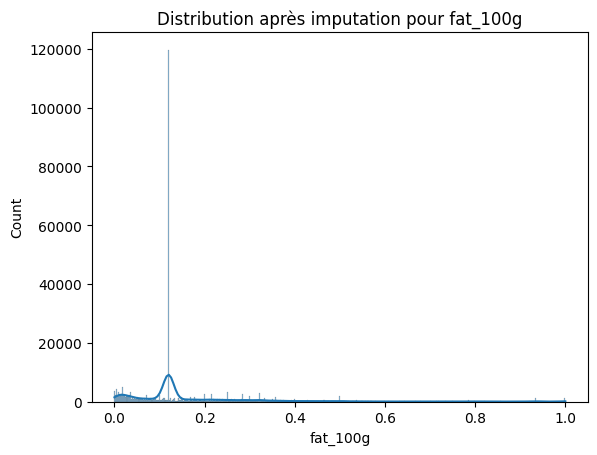

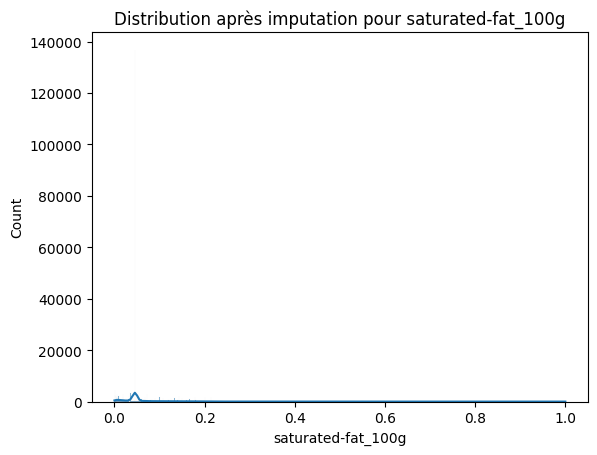

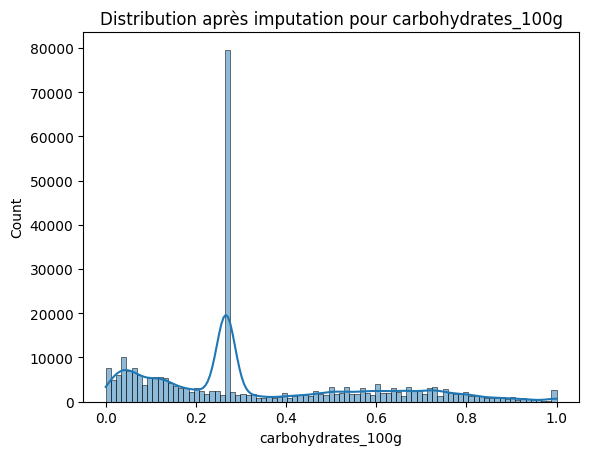

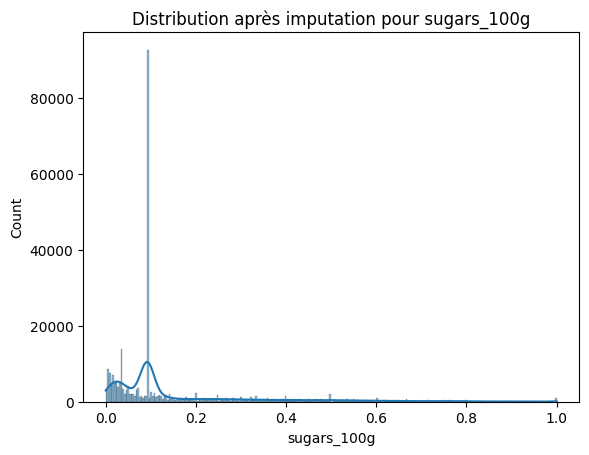

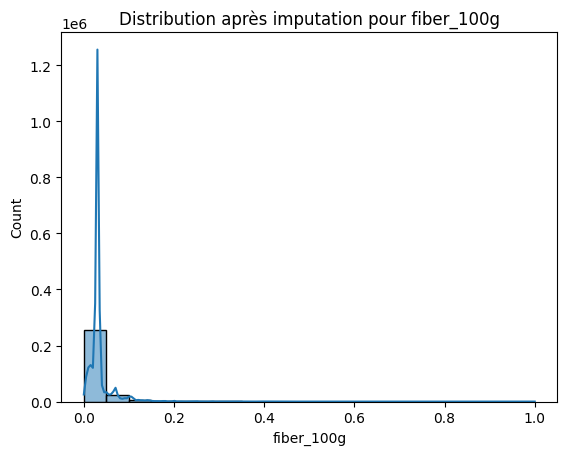

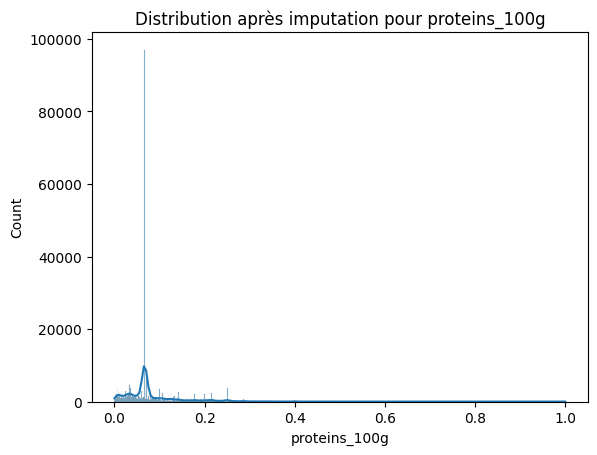

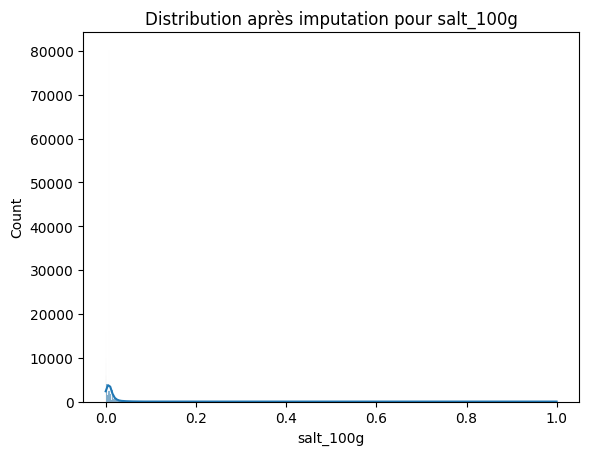

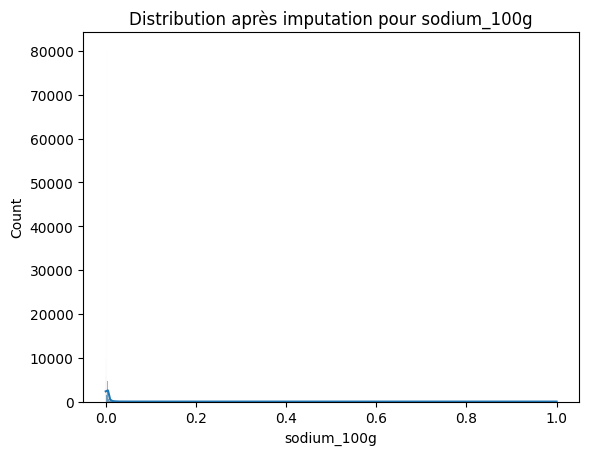

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution après imputation pour {col}")
    plt.show()

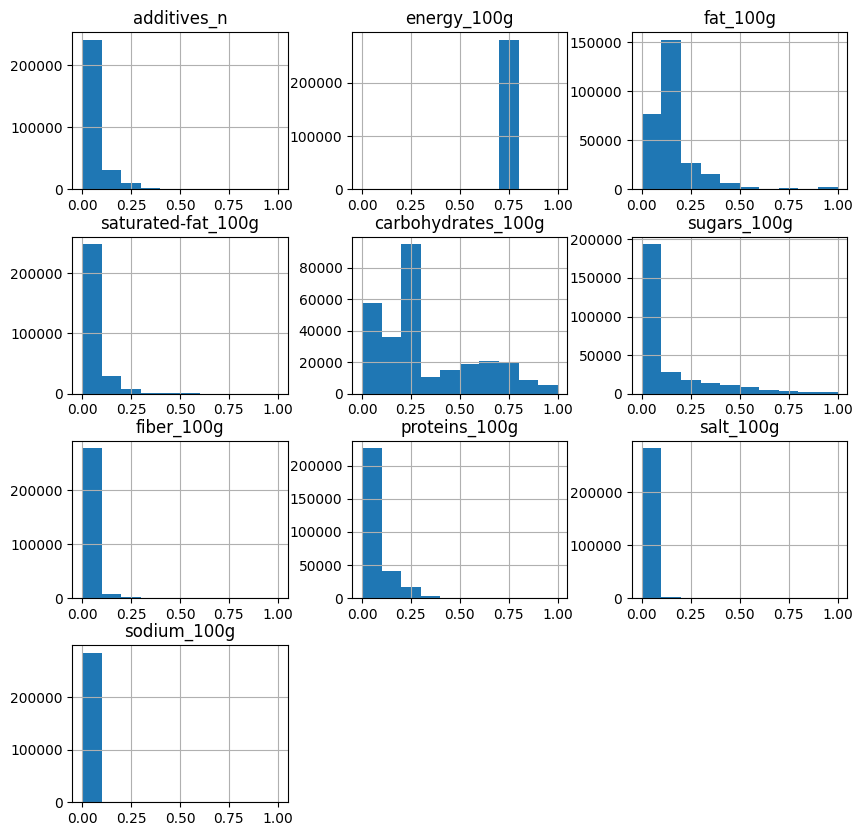

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

# 6. Exportation des Données Nettoyées

## 6.1. Préparation du format de sortie

## 6.2. Exportation des données nettoyées pour une utilisation ultérieure

In [ ]:
from datetime import datetime

now = datetime.now()

df.to_csv('./drive/MyDrive/test_notebook/exports/cleaned_data'+formatted_date+'.csv', index=False)